## Assignment Lending Club Case Study
#### Check Point 1: Import All libraries and set Session Variables 

In [78]:
import ast,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# the commonly used alias for seaborn is sns
import seaborn as sns

# set a seaborn style of your taste
sns.set_style("whitegrid")
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

#### Load the Loan.csv Data file in Pandas

In [80]:
#load loan data in loan dataframe
loan = pd.read_csv('C:\\Users\\Prashant\\Documents\\iiitb\\Lending-Club-Case-Study\\loan.csv', delimiter = ",", 
                   header=0, encoding = "ISO-8859-1", low_memory=False,skipinitialspace=True)


#### Cleanup the code, for below points
    ##### Drop all columns with NA values
    ##### Drop all rows with NA or Null values for data consistancy
    ##### take teh count of sum isnull.sum , must be 0 for all rws/cols left for analysis 

In [81]:
## pre cleanup couny of all null values 
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


#### Checkpoint 2 : Data Cleanup activities

In [82]:
#Cleaning DATA

#For calculation remove the months text from term , remove special characters from other fields
loan["term"] = loan["term"].apply(lambda x : int(x.replace("months", "")))
loan["int_rate"] = loan["int_rate"].apply(lambda x : str(x).replace("%", ""))
loan.emp_length.replace({r'[^0-9]+':''}, regex=True, inplace=True);

#remove empty rows
loan = loan[ loan["revol_util"].apply(lambda x: str(type(x))) == "<class 'str'>" ]
loan["revol_util"] = loan["revol_util"].apply(lambda x : str(x).replace("%", ""))

# Below columsn contan max null values, hebce useless for analysis ; dropping them from Data
loan.drop(columns=['mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc'], inplace = True)
loan.drop(columns=['mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl'], inplace = True)
loan.drop(columns=['num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts'], inplace = True)
loan.drop(columns=['num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m'], inplace = True)
loan.drop(columns=['pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim','total_bal_ex_mort'], inplace = True)
loan.drop(columns=['total_bc_limit','total_il_high_credit_limit'], inplace = True)
loan.drop(columns=['mths_since_recent_bc_dlq','num_rev_tl_bal_gt_0'], inplace = True)
loan.drop(columns=['annual_inc_joint','dti_joint','verification_status_joint','tot_coll_amt'], inplace = True)
loan.drop(columns=['tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m'], inplace = True)
loan.drop(columns=['mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m'], inplace = True)
loan.drop(columns=['max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl'], inplace = True)
loan.drop(columns=['inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy'], inplace = True)
loan.drop(columns=['bc_util','mo_sin_old_il_acct','mths_since_last_major_derog'], inplace = True)
loan.drop(columns=['next_pymnt_d','mths_since_last_delinq','mths_since_last_record','desc','emp_title'],inplace = True)
loan.drop(columns=['zip_code','title','url','policy_code','application_type','pymnt_plan'],inplace = True)

# Below rows contain limited Null Values, dropping all Null rows from data
loan.dropna(subset=['pub_rec_bankruptcies'],inplace=True)
loan.dropna(subset=['tax_liens'],inplace=True)
loan.dropna(subset=['chargeoff_within_12_mths'],inplace=True)
loan.dropna(subset=['collections_12_mths_ex_med'],inplace=True)
loan.dropna(subset=['last_pymnt_d'],inplace=True)
loan.dropna(subset=['emp_length'],inplace=True)
loan.dropna(subset=['last_credit_pull_d'],inplace=True)
            



#### Check count of Null alues , at this point its all cleaned data 

In [5]:
loan.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_py

#### Calculcte Adidtional columns for Loans 

In [83]:
# creat new joint columns for grade+subgrade for plotting
loan['loan_grade'] = loan.grade + loan.sub_grade

In [84]:
#create new calc column for EAD ( Exposure at default given by current outstading of loan)
loan['EAD'] = abs(loan.total_pymnt -(loan.total_rec_prncp + loan.total_rec_int+loan.total_rec_late_fee))

In [85]:
loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,loan_grade,EAD
0,1077501,1296599,5000,5000,"4,975.00",36,10.65,162.87,B,B2,10,RENT,"24,000.00",Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.00,0,0.00,0,0.00,0.00,BB2,0.00
1,1077430,1314167,2500,2500,"2,500.00",60,15.27,59.83,C,C4,1,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,car,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.00,0,0.00,0,0.00,0.00,CC4,117.08
2,1077175,1313524,2400,2400,"2,400.00",36,15.96,84.33,C,C5,10,RENT,"12,252.00",Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,f,0.00,0.00,"3,005.67","3,005.67","2,400.00",605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.00,0,0.00,0,0.00,0.00,CC5,0.00
3,1076863,1277178,10000,10000,"10,000.00",36,13.49,339.31,C,C1,10,RENT,"49,200.00",Source Verified,Dec-11,Fully Paid,other,CA,20.00,0,Feb-96,1,10,0,5598,21,37,f,0.00,0.00,"12,231.89","12,231.89","10,000.00","2,214.92",16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.00,0,0.00,0,0.00,0.00,CC1,0.00
4,1075358,1311748,3000,3000,"3,000.00",60,12.69,67.79,B,B5,1,RENT,"80,000.00",Source Verified,Dec-11,Current,other,OR,17.94,0,Jan-96,0,15,0,27783,53.90,38,f,524.06,524.06,"3,513.33","3,513.33","2,475.94","1,037.39",0.00,0.00,0.00,May-16,67.79,May-16,0.00,0,0.00,0,0.00,0.00,BB5,0.00


#### Checkpoint 3 : PLot relationship of NPA loans with difrent variables

In [35]:
#npa_loans relation with home ownership/loan_status 
df1 = loan.groupby(['loan_status','home_ownership']).size().to_frame(name = 'count').reset_index()



In [86]:
df1 = loan.groupby(['loan_status','home_ownership']).size().to_frame(name = 'count').reset_index()

In [87]:
df1.head()

,loan_status,home_ownership,count
0,Charged Off,MORTGAGE,2182
1,Charged Off,OTHER,18
2,Charged Off,OWN,382
3,Charged Off,RENT,2620
4,Current,MORTGAGE,617


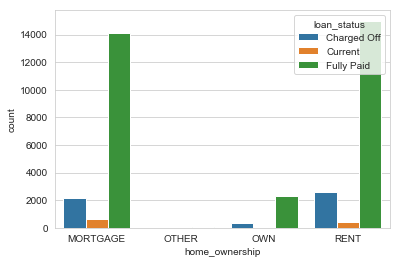

In [88]:
 ax = sns.barplot(x='home_ownership', y='count',hue='loan_status' , data=df1,orient='H')

In [ ]:
# correlation matrix ofhome_ownership / loan_status 
